## P4DS Summative Assignment 2

# Data Analysis Project


# Analysis of a used car dataset


#### Student ID: 202009291

# Project Plan

## The Data (15 marks)

The dataset I selected for this project can be found at: https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset. This dataset contains information about a set of used cars for sale in the US which, according to the description of the dataset, was scraped from the website https://www.cars.com/. Specifically, the dataset contains information about several features/properties of used cars, namely:

- <u>Brand</u>: the brand of the car;
- <u>Model</u>: the specific model of the car;
- <u>Year</u>: the year the car was manufactured;
- <u>Mileage</u>: how many miles the car has done;
- <u>Fuel type</u>: gasoline, diesel, etc.;
- <u>Engine</u>: the engine specifications (including engine volume);
- <u>Transmission</u>: manual, automatic, etc.;
- <u>External color</u>: the color of the car body;
- <u>Internal color</u>: the color of the car interior;
- <u>Accident</u>: whether the car was involved in accidents or not;
- <u>Clean title</u>: whether the car has a clean title (which is related to whether the car has suffered extensive damage and whether it is actually owned by the seller, that is, there are no outstanding loans);
- <u>Price</u>: the listed price of the car.

The dataset is rather small; it comprises 4,009 entries, each corresponding to a unique car listing.

As mentioned, the dataset was scraped from the web. Thus, it is a real-world dataset that is not clean and can contain errors due, for instance, to incorrect data insertion by the seller. As I will illustrate in my exploratory data analysis, there are indeed missing values in several features, some features have inconsistent dtypes, and the categories are also sometimes not consistent (that is, the same categories are referred to using different labels). 

A notable aspect of the original dataset is that it does not contain information regarding whether a car is electric, despite this being the case for several entries (for instance, all Tesla). 

Another important factor to note is that the 'engine' feature contains plenty of information regarding the engine 
specifications, but the engine volume (which I consider to be the most significant piece of information in this feature) is somewhat hidden among the other specifications. 

Furthermore, the 'brand' feature, which is relevant for my analysis, contains 57 different values. This is quite large considering how small the dataset is (4,009 entries); indeed, several of these brands have only a few entries each. 

Finally, upon inspection of the dataset, I have noticed the presence of several outliers in a few categories. I have kept them all for this project, but it may be wise to consider their influence in future analyses.



## Project Aim and Objectives (5 marks)

The overall aim of this project is to explore how various car characteristics influence their market value and to develop predictive models capable of estimating car prices and determining whether a car was involved in an accident based on the provided features. I learnt how to implement such models in the Data Science module.  

### Specific Objective(s)

- **Objective 1**: understand how the various features of the dataset affect the car price both qualitatively (using specific <u>visualization tools</u>) and quantitatively (through <u>correlation</u>). 

- **Objective 2**: develop a <u>random forest regression model</u> that is capable of predicting the car price based on selected features from the dataset and evaluate the prediction accuracy of the model using appropriate metrics.

- **Objective 3**: develop a <u>random forest classification model</u> that is capable of predicting whether a car was involved in an accident based on selected features from the dataset and evaluate the classification accuracy of the model using appropriate metrics.

As preliminary work, in order to achieve the above objectives, I perform several steps of data wrangling (exploration, cleaning, feature extraction, etc.) as well as data preprocessing (handling missing values, encoding categorical variables, etc.) to prepare the dataset into a format that is more suitable for data analysis and inspect relationships between features and price (objective 1) and for building machine learning models for regression and classification (objectives 2 and 3).



## System Design (5 marks)

### Architecture

For **objective 1**, the main stages of the pipeline I use to prepare the data are:

![Pipeline1](pipeline1.png)

I perform initial data exploration to gain basic insights into the dataset. I conduct dtype conversion on some features to facilitate data analysis. I extract two new features, namely engine size and car age, from the existing features. I make feature categories uniform, and I introduce an extra category ('electric') for fuel type. I check for outliers and/or unreasonable values. Finally, I discretize some features to facilitate visualization.

After these wrangling steps, I generate different plots to visualize the car price distribution, how various features influence the car price, and the correlation between numerical features. 


For **objectives 2 and 3**, on top of the previous steps, I process the data further according to this pipeline:

![Pipeline2](pipeline2.png)

With this pipeline, I first split the data into training and test sets to avoid data leakage. I then impute missing values and encode categories with OH encoder and target encoder. I set some reasonable hyperparameter values (to avoid overfitting), and I tune them using grid search in combination with cross validation. Finally, I fit the two models (random forest regressor for objective 2 and random forest classifier for objective 3) and evaluate their predictive performance.



### Processing Modules and Algorithms

Prior to addressing the three objectives, I prepare the dataset according to the following modules and algorithms:

1. Data exploration:\
    a. Gaining some basic insights into the dataset (size, missing values, statistics)\
    b. Checking for duplicates\
    c. Renaming some columns for clarity
2. Dtype conversion - I create two functions, one to check unit consistency and one to convert an alphanumeric string to float:\
    a. Dtype conversion of mileage and price\
    b. Dtype conversion of accident and clean_title
3. Feature extraction - I extract two new features:\
    a. Engine size (I create a function to extract the engine size in litres from the engine column)\
    b. Car age
4. Category unification - I unify the labels of two features:\
    a. Fuel type\
    b. Transmission
5. Creating the category electric for fuel type based on specific assumptions
6. Checking for outliers and/or unreasonable values and dealing with them
7. Discretization - I discretize the following features to facilitate future visualization:\
    a. Engine size\
    b. Mileage

**Objective 1 - visualization and correlation**:\
1.1 Visualize price distribution\
1.2 Plot price vs mileage and car age\
1.3 Plot price vs engine size and fuel type\
1.4 Plot price vs transmission, accident, and clean title\
1.5 Plot price vs brand\
1.6 Investigate correlation between numerical features

**Objective 2 - build a random forest regression model to predict the car price**:\
2.1 Train/test split\
2.2 Data preprocessing (imputing and encoding)\
2.3 Grid search with cross validation\
2.4 Model fitting\
2.5 Model evaluation

**Objective 3 - build a random forest classification model to predict whether a car was involved in an accident**:\
3.1 Train/test split\
3.2 Data preprocessing (imputing and encoding)\
3.3 Grid search with cross validation\
3.4 Model fitting\
3.5 Model evaluation

# Program Code (25 marks)

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (r2_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)

I import the dataframe.

In [2]:
df = pd.read_csv('used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


# 1. Data exploration

## 1a. Gaining some basic insights into the dataset

In [3]:
print('The dataset has {}'.format(df.shape[0]), 'entries and {}'.format(df.shape[1]), 'features, namely:')
for column in df.columns:
    print('{}'.format(column))

The dataset has 4009 entries and 12 features, namely:
brand
model
model_year
milage
fuel_type
engine
transmission
ext_col
int_col
accident
clean_title
price


In [4]:
df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

There are missing values in the columns 'fuel_type', 'accident', and 'clean_title'. I will deal with these later.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


The columns 'milage', 'accident', 'clean_title', and 'price' should be converted to a different dtype. I will deal with this later.

In [6]:
df.describe(include='all')

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009.000000,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,NaN,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,NaN,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,NaN,16,3309,52,1037,905,2025,2910,3413,39
mean,NaN,NaN,2015.515590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.104816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are several unique categories for many features, e.g. 'brand', 'model', 'engine', 'transmission', 'ext_col', and 'int_col'. This requires careful consideration, and I will deal with this differently depending on the objective.

## 1b. Checking for duplicates

In [7]:
print('The dataframe contains {}'.format(df.duplicated().sum()), 'duplicate entries')                      

The dataframe contains 0 duplicate entries


## 1c. Renaming some columns for clarity

In [8]:
df.rename(columns={'model_year': 'year', 'milage':'mileage'}, inplace=True)
df.head()

,brand,model,year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


# 2. Dtype conversion  (after careful checking and cleaning)

I create the function below to check the unit consistency of some columns of the df.

In [9]:
def check_units(entries, unit):
    '''
        Checks that all the entries in a specific df column have the expected unit.
        Returns a list of entries with other units (or invalid types), if present.
    '''
    if not isinstance(unit, str):
        raise TypeError(f"'unit' must be a string, got {type(unit)}")

    invalid_entries = []
    
    for entry in entries:
        try:
            # Ensure string comparison is safe
            if pd.isna(entry) or unit not in str(entry):
                invalid_entries.append(entry)
        except Exception as e:
            print(f"Warning: failed to check entry '{entry}': {e}")
            invalid_entries.append(entry)

    if not invalid_entries:
        print(f"No unexpected units found in column '{entries.name}'.")
    return invalid_entries

In [10]:
check_units(df.mileage, 'mi.') #check the units of the column 'mileage'

No unexpected units found in column 'mileage'.


[]

In [11]:
check_units(df.price, '$') #check the units of the column 'price'

No unexpected units found in column 'price'.


[]

I create the function below to convert an alphanumeric string to float. I will then use this function for changing the dtype of the columns 'mileage' and 'price' to float.

In [12]:
def convert_string_to_float(value):
    '''
        Remove non-numeric characters and convert to float.
        Returns NaN if conversion fails.
    '''
    try:
        if pd.isna(value):
            return np.nan

        # Ensure value is a string
        s = str(value)
    
        cleaned = ''.join(ch for ch in s if ch.isnumeric() or ch == '.')
    
        if cleaned == "":
            return np.nan
        
        return float(cleaned)

    except Exception as e:
        print(f"Warning: Could not convert '{value}' to float: {e}")
        return np.nan

## 2a. Dtype conversion of 'mileage' and 'price'

In [13]:
df.mileage = df.mileage.apply(convert_string_to_float) #I apply the above function to the 'mileage' column
df.price = df.price.apply(convert_string_to_float) #I apply the above function to the 'price' column

## 2b. Dtype conversion of 'accident' and 'clean_title'

I also change the dtype of these two features to float.

In [14]:
df.accident.value_counts() #checking the different values of 'accident'

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [15]:
#replacing these values with 0 and 1
df['accident'] = df['accident'].replace({
    'None reported': 0,
    'At least 1 accident or damage reported': 1
})

C:\Users\arian\AppData\Local\Temp\ipykernel_23936\844775846.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['accident'] = df['accident'].replace({


In [16]:
df.clean_title.value_counts() #checking the different values of 'clean_title'

clean_title
Yes    3413
Name: count, dtype: int64

In [17]:
#replacing these values with 0 and 1 (assuming that NaN corresponds to No)
df['clean_title'] = df['clean_title'].replace('Yes', 1)
df['clean_title'] = df['clean_title'].fillna(0)

C:\Users\arian\AppData\Local\Temp\ipykernel_23936\1215553098.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['clean_title'] = df['clean_title'].replace('Yes', 1)


In [18]:
df.info() #I check the df again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   year          4009 non-null   int64  
 3   mileage       4009 non-null   float64
 4   fuel_type     3839 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      3896 non-null   float64
 10  clean_title   4009 non-null   float64
 11  price         4009 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 376.0+ KB


The dtype conversion worked as intended.

# 3. Feature extraction

I extract two new features from the existing features, namely 'engine_size' and 'car_age'.

## 3a. 'Engine_size'

The most important information in the 'engine' column is probably the engine size, which is given in litres. I extract this information using the following function.

In [19]:
def extract_engine_size(value):
    '''
        Extracts engine size (in liters) from a string.
        Returns float or NaN.
    '''   
    try:
        if pd.isna(value):
            return np.nan

        parts = str(value).lower().split()
    
        #loops through the various parts of the string
        for (i, part) in enumerate (parts):
            
            #case 1: there is no space between the number and the unit
            if any(unit in part for unit in ["l", "liter", "liters"]):
                num = ''.join(ch for ch in part if (ch.isnumeric() or ch == '.'))
                if num:
                    return float(num)
            
            #case 2: there is a space between the number and the unit
            if part.replace('.', '').isnumeric() and i+1 < len(parts): 
                next_part = parts[i+1]
                if next_part.startswith('l'):  #check if the next part starts with l
                    return float(part)
        return np.nan
    
    except Exception as e:
        print(f"Warning: could not parse engine size from '{value}': {e}")
        return np.nan

In [20]:
df.engine = df.engine.apply(extract_engine_size) #I apply the above function to the 'engine' column

In [21]:
df.head()

,brand,model,year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,3.7,6-Speed A/T,Black,Black,1.0,1.0,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8,8-Speed Automatic,Moonlight Cloud,Gray,1.0,1.0,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5,Automatic,Blue,Black,0.0,0.0,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,3.5,7-Speed A/T,Black,Black,0.0,1.0,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0,8-Speed Automatic,Glacier White Metallic,Black,0.0,0.0,34999.0


In [22]:
df.engine.isna().sum()

np.int64(217)

There are 217 NaN values in the 'engine' column that were not there before! I investigate where they come from.

In [23]:
df[df.engine.isna()].head(15)

,brand,model,year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
9,Tesla,Model X Long Range Plus,2020,34000.0,NaN,NaN,A/T,Black,Black,0.0,1.0,69950.0
10,Land,Rover Range Rover Sport 3.0 Supercharged HST,2021,27608.0,Gasoline,NaN,Automatic,Fuji White,Pimento / Ebony,0.0,0.0,73897.0
32,BMW,i3 120Ah w/Range Extender,2020,35035.0,Hybrid,NaN,Automatic,Black,Black,0.0,0.0,24998.0
44,Lucid,Air Grand Touring,2022,3552.0,NaN,NaN,1-Speed A/T,Red,Beige,0.0,1.0,119999.0
68,Lucid,Air Grand Touring,2022,4900.0,NaN,NaN,1-Speed A/T,Red,Black,0.0,1.0,99000.0
92,Rivian,R1S Adventure Package,2023,2800.0,NaN,NaN,1-Speed A/T,White,Green,0.0,1.0,92000.0
120,Land,Rover Range Rover Sport 3.0L Supercharged HSE,2018,104700.0,Gasoline,NaN,Automatic,Fuji White,Ivory / Ebony,1.0,0.0,30775.0
122,Rivian,R1S Adventure Package,2023,2500.0,NaN,NaN,A/T,Green,White,0.0,1.0,94000.0
129,Lucid,Air Pure,2023,1300.0,NaN,NaN,A/T,Black,Gray,NaN,0.0,86900.0
130,Chrysler,Pacifica Touring,2017,87305.0,–,NaN,9-Speed A/T,Silver,Black,0.0,1.0,9000.0


While some of these NaN clearly derive from the fact that no engine size was specified in the 'engine' column, some derive from the fact that the corresponding cars are electric (e.g., Tesla). I will deal with this later.

In [24]:
df.rename(columns={'engine': 'engine_size'}, inplace=True) #I rename the 'engine' column as 'engine_size'
df.head()

,brand,model,year,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,3.7,6-Speed A/T,Black,Black,1.0,1.0,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8,8-Speed Automatic,Moonlight Cloud,Gray,1.0,1.0,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5,Automatic,Blue,Black,0.0,0.0,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,3.5,7-Speed A/T,Black,Black,0.0,1.0,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0,8-Speed Automatic,Glacier White Metallic,Black,0.0,0.0,34999.0


## 3b. 'Car_age'

I do not know exactly when this dataset was scraped from the web. But I do know the year of the newest cars in the dataset, which is:

In [25]:
df.year.max()

2024

Assuming this is the year when the dataset was created, I can easily calculate the car age.

In [26]:
df['car_age'] = df['year'].max() - df['year']

df.drop('year', axis=1, inplace=True) #I drop the column 'year'
df.head()

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,3.7,6-Speed A/T,Black,Black,1.0,1.0,10300.0,11
1,Hyundai,Palisade SEL,34742.0,Gasoline,3.8,8-Speed Automatic,Moonlight Cloud,Gray,1.0,1.0,38005.0,3
2,Lexus,RX 350 RX 350,22372.0,Gasoline,3.5,Automatic,Blue,Black,0.0,0.0,54598.0,2
3,INFINITI,Q50 Hybrid Sport,88900.0,Hybrid,3.5,7-Speed A/T,Black,Black,0.0,1.0,15500.0,9
4,Audi,Q3 45 S line Premium Plus,9835.0,Gasoline,2.0,8-Speed Automatic,Glacier White Metallic,Black,0.0,0.0,34999.0,3


# 4. Category unification

As the code below shows, the columns 'fuel_type' and 'transmission' contain some categories that can be considered equivalent and some categories that should be replaced by NaN.

## 4a. 'fuel_type' column

In [27]:
df.fuel_type.value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

For my analysis, I think the categories 'Plug-In Hybrid' and 'Hybrid' can be considered equivalent. I also replace '–' and 'not supported' with NaN.

In [28]:
df.fuel_type = df.fuel_type.replace({
    'Plug-In Hybrid': 'Hybrid',
    '–': np.nan,
    'not supported': np.nan
})

In [29]:
df.fuel_type.value_counts()

fuel_type
Gasoline         3309
Hybrid            228
E85 Flex Fuel     139
Diesel            116
Name: count, dtype: int64

The number of different categories has been reduced from 7 to 4 (+ NaN values).

## 4b. 'transmission' column

In [30]:
df.transmission.value_counts()

transmission
A/T                                  1037
8-Speed A/T                           406
Transmission w/Dual Shift Mode        398
6-Speed A/T                           362
6-Speed M/T                           248
                                     ... 
10-Speed Automatic with Overdrive       1
9-Speed Automatic with Auto-Shift       1
SCHEDULED FOR OR IN PRODUCTION          1
6 Speed Mt                              1
8-Speed Manual                          1
Name: count, Length: 62, dtype: int64

Automatic and manual transmission are written using many different terms, which are equivalent. I create the function below to make the categories in the 'transmission' column uniform. 

In [31]:
def make_transmission_uniform(value):
    '''
        Normalize transmission type.
        Returns 'automatic', 'manual', or NaN.
    '''   
    try:
        if pd.isna(value):
            return np.nan

        s = str(value).lower()
        
        #possible terms for automatic and manual transmission used in the df
        automatic = ['a/t', 'at', 'auto', 'automatic', 'cvt', 'transmission w/dual shift mode', 
                     'transmission overdrive switch', 'variable']
        manual = ['m/t', 'mt', 'man', 'manual']
        
        if any(term in s for term in automatic):
            return 'automatic'
        elif any(term in s for term in manual):
            return 'manual'
        else:
            return np.nan
    
    except Exception as e:
        print(f"Warning: could not normalize transmission value '{value}': {e}")
        return np.nan

In [32]:
df.transmission = df.transmission.apply(make_transmission_uniform) #I apply the above function to the 'transmission' column

In [33]:
df.transmission.value_counts()

transmission
automatic    3623
manual        373
Name: count, dtype: int64

The number of different categories has been reduced from 62 to 2 (+ NaN values).

In [34]:
df.isna().sum()

brand             0
model             0
mileage           0
fuel_type       217
engine_size     217
transmission     13
ext_col           0
int_col           0
accident        113
clean_title       0
price             0
car_age           0
dtype: int64

# 5. Creating the category 'electric' (based on assumptions)

I do not know much about cars, but I start with the assumption that if both 'fuel_type' and 'engine_size' are NaN, then the car is electric. This is for instance the case for all Tesla in the df (see code below).

In [35]:
tesla_df = df[df['brand'] == 'Tesla']

print('There are {}'.format(tesla_df.shape[0]), 'Teslas in the df,')
print('and among these, {}'.format(tesla_df.fuel_type.isna().sum()), 'have fuel_type = NaN,')
print('and {}'.format(tesla_df.engine_size.isna().sum()), 'have engine_size = NaN.')

There are 87 Teslas in the df,
and among these, 87 have fuel_type = NaN,
and 87 have engine_size = NaN.


I check how many entries satisfy both conditions and I order them by car_age.

In [36]:
df[df['fuel_type'].isna() & df['engine_size'].isna()].sort_values('car_age', ascending=False)

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age
855,Ford,Bronco,6217.0,NaN,NaN,NaN,Dark Gray Metallic,–,0.0,1.0,115000.0,50
1088,Mazda,MX-5 Miata Base,125800.0,NaN,NaN,manual,Red,Black,0.0,1.0,11500.0,32
692,Honda,Civic EX,58981.0,NaN,NaN,automatic,White,Beige,0.0,1.0,9599.0,31
1134,Mercedes-Benz,E-Class 400E,106983.0,NaN,NaN,automatic,White,Gray,0.0,1.0,15300.0,31
257,Toyota,Land Cruiser Base,231500.0,NaN,NaN,automatic,White,Gray,0.0,1.0,29500.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...
2472,Rivian,R1S Launch Edition,1885.0,NaN,NaN,automatic,Green,White,0.0,1.0,93500.0,1
2956,Tesla,Model Y Long Range,7414.0,NaN,NaN,automatic,Black,White,0.0,1.0,56515.0,1
3649,Volkswagen,ID.4 Pro S,1716.0,NaN,NaN,automatic,Gray,Gray w/Blue Bolsters,0.0,0.0,39998.0,1
3768,GMC,HUMMER EV Edition 1,940.0,NaN,NaN,automatic,White,Black,NaN,0.0,146000.0,1


Clearly my assumption is not quite correct, as it cannot be that cars that are 50- or 30-years-old are electric! Searching the web, I found that the 'Nissan Leaf' was the first mass-market electric vehicle in the US. I check if these cars are in my df and how old they are in the cell below.

In [37]:
nissan_leaf_df = df[(df['brand'] == 'Nissan') & (df['model'].str.contains('Leaf'))]
nissan_leaf_df.sort_values('car_age', ascending=False)

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age
543,Nissan,Leaf SL,102000.0,NaN,NaN,automatic,Silver,Gray,0.0,1.0,4200.0,12
1235,Nissan,Leaf SL,26930.0,NaN,NaN,automatic,White,Beige,0.0,1.0,6700.0,12
542,Nissan,Leaf S,56450.0,NaN,NaN,automatic,Black,Black,1.0,1.0,13999.0,6
943,Nissan,Leaf SV PLUS,7089.0,NaN,NaN,automatic,Black,Black,1.0,1.0,29895.0,1
1542,Nissan,Leaf SV PLUS,5121.0,NaN,NaN,automatic,Brilliant Silver Metallic,Black,0.0,1.0,28196.0,1


Based on these observations, I refine my initial assumption. I now assume that if both 'fuel_type' and 'engine_size' are NaN
and the car is at most 12-year-old, then the car is electric. I incorporate this information as a category of the 'fuel_type' column, while I leave the engine_size as Nan.

In [38]:
df.loc[(df['fuel_type'].isna()) & (df['engine_size'].isna()) & (df['car_age'] <= 12), 'fuel_type'] = 'Electric'

In [39]:
df.fuel_type.isna().sum()

np.int64(39)

Now I have only 39 Nan values in the 'fuel_type' column, rather than 217.

# 6. Checking for outliers and/or unreasonable values


This is particularly important for the features I have processed, as I may have introduced some errors. But I also check other key features.

## 6a. Mileage

In [40]:
df.nlargest(5, 'mileage')

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age
2764,Honda,Accord Sport,405000.0,Gasoline,2.4,automatic,Black,Black,0.0,1.0,6000.0,11
3348,Mercedes-Benz,Sprinter 2500,399000.0,Diesel,3.0,automatic,Silver,–,1.0,1.0,24500.0,8
2175,Ford,Excursion Limited,333361.0,Diesel,7.3,automatic,Black,Beige,1.0,1.0,17000.0,23
3757,Ford,F-250 XL Crew Cab Super Duty,315000.0,Diesel,6.0,automatic,White,Gray,0.0,1.0,9200.0,20
31,Dodge,Ram 1500 Laramie Mega Cab,300183.0,Gasoline,5.7,automatic,Silver,Gray,1.0,1.0,10900.0,18


In [41]:
df.nsmallest(5, 'mileage')

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age
3018,GMC,Sierra 1500 AT4,100.0,Diesel,3.0,automatic,White,Black,0.0,1.0,62499.0,2
1848,Mercedes-Benz,Sprinter 3500 High Roof,105.0,Diesel,2.0,automatic,Black,Orange,0.0,1.0,200000.0,2
487,Rolls-Royce,Cullinan,115.0,Gasoline,6.7,automatic,–,Grace White,0.0,1.0,449995.0,2
1691,BMW,M3 CS,124.0,Gasoline,3.0,automatic,Green,Black,0.0,1.0,145000.0,0
3600,Porsche,911 Turbo S,154.0,Gasoline,3.8,automatic,Python Green,Black,0.0,0.0,274900.0,1


This feature seems to be OK.

## 6b. Engine size

In [42]:
df.nlargest(5, 'engine_size')

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age
1061,Dodge,Viper GTC,1389.0,Gasoline,8.4,manual,Black,Black,0.0,1.0,489995.0,7
1192,Dodge,Ram 1500 SRT-10 Quad Cab,138450.0,Gasoline,8.3,automatic,Red,Black,1.0,1.0,19000.0,19
1283,Dodge,Ram 1500 SRT-10,73000.0,Gasoline,8.3,manual,Black,Gray,0.0,1.0,22500.0,20
2018,Dodge,Viper SRT-10,10800.0,Gasoline,8.3,manual,Silver,Black,0.0,1.0,65499.0,21
837,Chevrolet,Suburban 2500 LS,60000.0,Gasoline,8.1,automatic,Brown,Brown,1.0,1.0,24950.0,18


In [43]:
df.nsmallest(10, 'engine_size')

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age
1098,BMW,i3 Base w/Range Extender,29553.0,NaN,0.65,automatic,Black,Gray,0.0,1.0,12800.0,10
3090,BMW,i3 120Ah w/Range Extender,16975.0,NaN,0.65,automatic,Black,Black,0.0,1.0,26990.0,5
3255,BMW,i3 Base,26000.0,NaN,0.65,automatic,White,Beige,0.0,1.0,14999.0,9
3324,BMW,i3 Base w/Range Extender,74500.0,NaN,0.65,automatic,White,Gray,0.0,1.0,11499.0,10
3468,BMW,i3 94 Ah,43000.0,NaN,0.65,automatic,Black,–,0.0,1.0,16500.0,7
2261,smart,ForTwo Pure,61595.0,Gasoline,1.00,automatic,Blue,Gray,0.0,1.0,5000.0,16
256,Chevrolet,Trailblazer LT,50648.0,Gasoline,1.20,automatic,Pacific Blue Metallic,Jet Black,0.0,0.0,23995.0,3
696,Chevrolet,Trailblazer LS,24965.0,Gasoline,1.20,automatic,Mosaic Black Metallic,Jet Black,1.0,1.0,22995.0,3
1528,Mitsubishi,Mirage ES,35698.0,Gasoline,1.20,automatic,Blue,Black,0.0,1.0,8750.0,7
176,Chevrolet,Trailblazer LS,20497.0,Gasoline,1.30,automatic,Pacific Blue Metallic,Black,0.0,0.0,22999.0,3


An engine size of 0.65 litres seems to be too small, especially for a BMW! Upon checking the web, it seems that these cars have a small engine to recharge the battery, but they should actually be considered electric. So, I rectify this manually.

In [44]:
#change the 'fuel_type' of these cars to 'Electric'
df.loc[df['engine_size'] == 0.65, 'fuel_type'] = 'Electric'

#change the 'engine size' of these cars to 'NaN'
df.loc[df['engine_size'] == 0.65, 'engine_size'] = np.nan

#check the df for one of them, to see if my code has worked
df[1098:1099]

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age
1098,BMW,i3 Base w/Range Extender,29553.0,Electric,NaN,automatic,Black,Gray,0.0,1.0,12800.0,10


## 6c. Car age

In [45]:
df.nlargest(5, 'car_age')

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age
855,Ford,Bronco,6217.0,NaN,NaN,NaN,Dark Gray Metallic,–,0.0,1.0,115000.0,50
1088,Mazda,MX-5 Miata Base,125800.0,NaN,NaN,manual,Red,Black,0.0,1.0,11500.0,32
257,Toyota,Land Cruiser Base,231500.0,NaN,NaN,automatic,White,Gray,0.0,1.0,29500.0,31
692,Honda,Civic EX,58981.0,NaN,NaN,automatic,White,Beige,0.0,1.0,9599.0,31
1134,Mercedes-Benz,E-Class 400E,106983.0,NaN,NaN,automatic,White,Gray,0.0,1.0,15300.0,31


In [46]:
df.nsmallest(5, 'car_age') #as expected, it is 0

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age
443,BMW,M3 CS,456.0,Gasoline,3.0,automatic,Black,Black,0.0,1.0,128995.0,0
556,Mazda,CX-90 Premium,3880.0,Gasoline,2.5,automatic,Machine Gray Metallic,Black,0.0,1.0,52991.0,0
1691,BMW,M3 CS,124.0,Gasoline,3.0,automatic,Green,Black,0.0,1.0,145000.0,0
2289,BMW,840 i xDrive,1500.0,Gasoline,3.0,automatic,Gray,Brown,0.0,1.0,90000.0,0
3309,GMC,Sierra 2500 Denali,2043.0,Gasoline,6.6,automatic,White,Black,0.0,1.0,81500.0,0


50 years seems to be a lot for a car, but upon checking the web, it seems that this is indeed possible for a Ford Bronco. So, I keep this entry even if it is a clear outlier. 

## 6d. Price

In [47]:
df.nlargest(5, 'price')

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age
693,Maserati,Quattroporte Base,32000.0,Gasoline,4.2,automatic,Red,Beige,1.0,1.0,2954083.0,19
229,Bugatti,Veyron 16.4 Grand Sport,6330.0,Gasoline,8.0,automatic,White,White,0.0,1.0,1950995.0,13
3046,Porsche,Carrera GT Base,4400.0,Gasoline,5.7,manual,Gray,Black,0.0,1.0,1599000.0,19
1356,Lamborghini,Aventador SVJ Base,6987.0,Gasoline,6.5,NaN,–,Nero Ade,0.0,1.0,749950.0,3
624,Rolls-Royce,Cullinan,398.0,Gasoline,6.7,automatic,Silver,Charles Blue,0.0,1.0,695000.0,2


In [48]:
df.nsmallest(5, 'price') 

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age
425,Lincoln,Aviator Luxury,140000.0,Gasoline,4.6,automatic,Black,Beige,0.0,1.0,2000.0,19
89,Subaru,Forester 2.5 X,210703.0,Gasoline,2.5,manual,Green,Beige,NaN,0.0,2300.0,20
3640,Nissan,Maxima GLE,194277.0,Gasoline,3.0,automatic,Blue,Beige,1.0,1.0,2300.0,24
626,Pontiac,Firebird Base,158000.0,Gasoline,3.8,automatic,White,Black,1.0,1.0,2500.0,25
1292,BMW,323 Ci,177700.0,Gasoline,2.5,automatic,Silver,Black,0.0,1.0,2500.0,24


There are at least three cars that are significantly more expensive that the other cars. At this stage, however, I keep all outliers. 

# 7. Discretization

I discretize two features, namely 'engine_size' and 'mileage', because this will help me in the visualization of how such features affect the car price (objective 1).

## 7a. 'Engine-size'

In [49]:
bins = np.linspace(df.engine_size.min(), df.engine_size.max(), 6) # Create 5 intervals
labels = ['Extra small', 'Small', 'Medium', 'Large', 'Extra large']
df['engine_size_binned'] = pd.cut(df['engine_size'], bins=bins, labels=labels)
df.head()

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age,engine_size_binned
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,3.7,automatic,Black,Black,1.0,1.0,10300.0,11,Small
1,Hyundai,Palisade SEL,34742.0,Gasoline,3.8,automatic,Moonlight Cloud,Gray,1.0,1.0,38005.0,3,Small
2,Lexus,RX 350 RX 350,22372.0,Gasoline,3.5,automatic,Blue,Black,0.0,0.0,54598.0,2,Small
3,INFINITI,Q50 Hybrid Sport,88900.0,Hybrid,3.5,automatic,Black,Black,0.0,1.0,15500.0,9,Small
4,Audi,Q3 45 S line Premium Plus,9835.0,Gasoline,2.0,automatic,Glacier White Metallic,Black,0.0,0.0,34999.0,3,Extra small


## 7b. 'Mileage'

In [50]:
bins = np.linspace(df.mileage.min(), df.mileage.max(), 42) # Create 41 intervals. In this way, 
                                                            #each bin roughly corresponds to 10,000 miles
labels = list(np.linspace(0, 400000, 41))
df['mileage_binned'] = pd.cut(df['mileage'], bins=bins, labels=labels)
df.head()

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age,engine_size_binned,mileage_binned
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,3.7,automatic,Black,Black,1.0,1.0,10300.0,11,Small,50000.0
1,Hyundai,Palisade SEL,34742.0,Gasoline,3.8,automatic,Moonlight Cloud,Gray,1.0,1.0,38005.0,3,Small,30000.0
2,Lexus,RX 350 RX 350,22372.0,Gasoline,3.5,automatic,Blue,Black,0.0,0.0,54598.0,2,Small,20000.0
3,INFINITI,Q50 Hybrid Sport,88900.0,Hybrid,3.5,automatic,Black,Black,0.0,1.0,15500.0,9,Small,80000.0
4,Audi,Q3 45 S line Premium Plus,9835.0,Gasoline,2.0,automatic,Glacier White Metallic,Black,0.0,0.0,34999.0,3,Extra small,0.0


I keep a copy of this final dataframe.

In [51]:
df_copy = df.copy()

# Objective 1

Investigate how the various features of the dataset affect the car price thorough visualization and correlation. 

For the visualization, I focus on the following features:
- Mileage and car age (continuous)
- Engine size and fuel type (categorical, several categories)
- Transmission, accident, and clean title (categorical, binary)
- Brand (categorical, many categories)

For the correlation, I focus on the numerical features.

First of all, I check the price distribution. 

In [52]:
scaling_factor = 1000 #scaling factor that I will use for plotting

## 1.1 Visualize price distribution

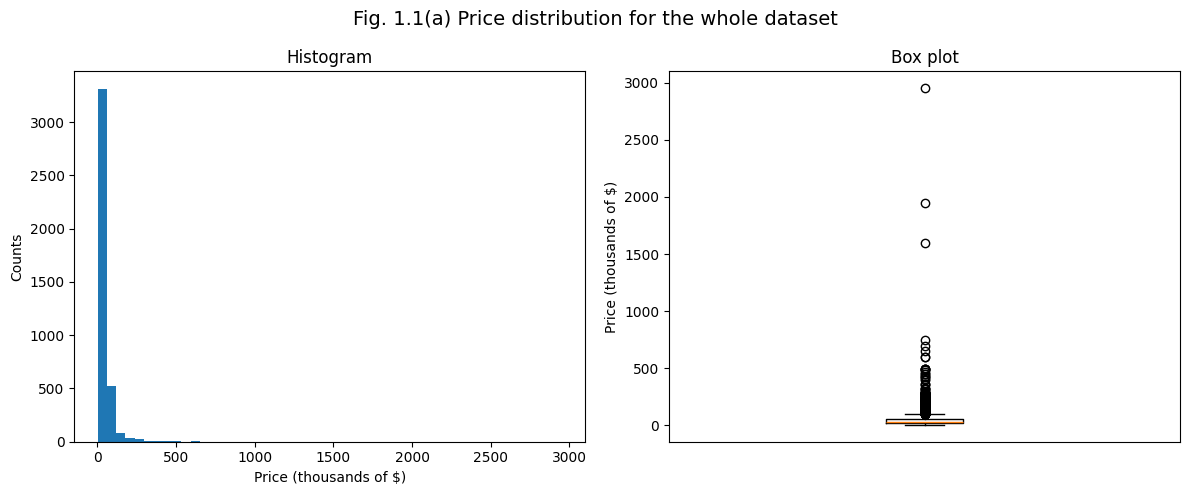

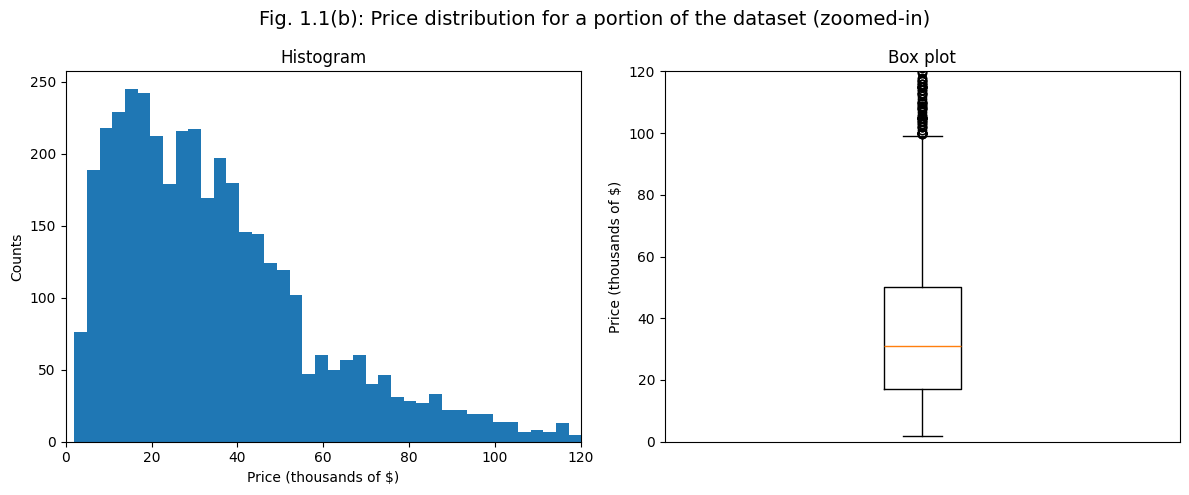

In [53]:
#figure for the whole dataframe
fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].hist(df.price/scaling_factor, bins=50)
axs[1].boxplot(df.price/scaling_factor)

axs[0].set_title('Histogram')
axs[0].set_xlabel('Price (thousands of $)')
axs[0].set_ylabel('Counts')

axs[1].set_title('Box plot')
axs[1].set_ylabel('Price (thousands of $)')
axs[1].set_xticks([])

fig.suptitle('Fig. 1.1(a) Price distribution for the whole dataset', fontsize=14)

plt.tight_layout()
plt.show()

#figure for a portion of the dataframe (I zoom in)
fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].hist(df.price/scaling_factor, bins=1000)
axs[1].boxplot(df.price/scaling_factor)

axs[0].set_title('Histogram')
axs[0].set_xlabel('Price (thousands of $)')
axs[0].set_ylabel('Counts')
axs[0].set_xlim(0, 120) #limit to better see the histogram without the outliers

axs[1].set_title('Box plot')
axs[1].set_ylabel('Price (thousands of $)')
axs[1].set_xticks([])
axs[1].set_ylim(0, 120) #limit to better see the box-plot without the outliers

fig.suptitle('Fig. 1.1(b): Price distribution for a portion of the dataset (zoomed-in)', fontsize=14)

plt.tight_layout()
plt.show()

## 1.2 Plot price vs mileage and car age

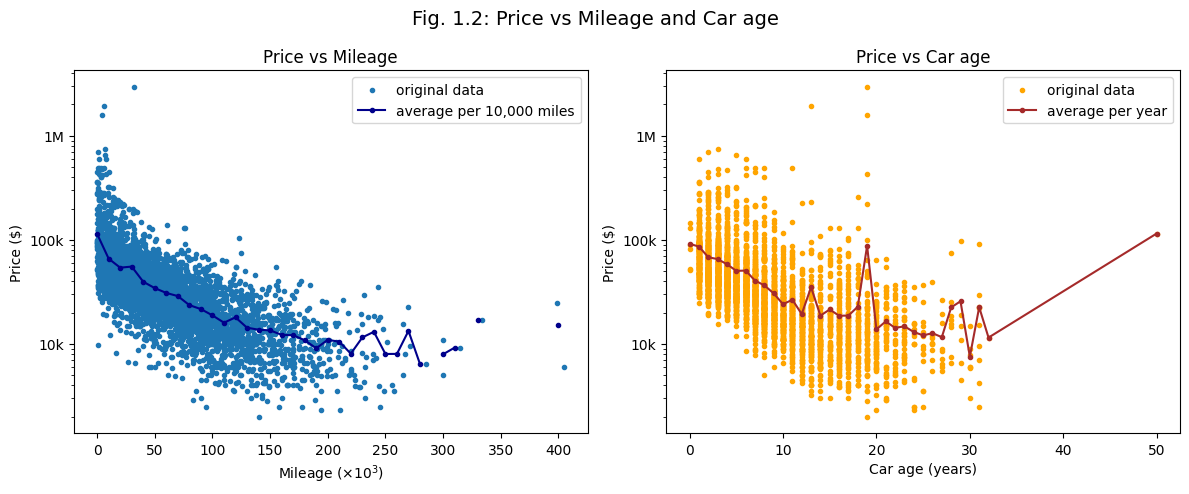

In [54]:
df_mileage_grouped = df.groupby(by=['mileage_binned'], observed=False)['price'].mean() #average car price per 10,000 miles of mileage
df_car_age_grouped = df.groupby(by=['car_age'], observed=False)['price'].mean() #average car price per year of car age

fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].scatter(df.mileage/scaling_factor, df.price, marker = '.', label='original data')
axs[0].plot(df_mileage_grouped.index.astype(float)/scaling_factor, df_mileage_grouped.values, '.-', color='darkblue', label = 'average per 10,000 miles')
axs[1].scatter(df.car_age, df.price, marker = '.', color = 'orange', label='original data')
axs[1].plot(df_car_age_grouped.index, df_car_age_grouped.values, '.-', color='brown', label = 'average per year')

axs[0].set_yscale('log') 
axs[1].set_yscale('log') 

axs[0].legend()
axs[1].legend()

axs[0].set_title('Price vs Mileage')
axs[0].set_xlabel(r'Mileage ($\times 10^3)$')
axs[0].set_ylabel('Price ($)')
axs[0].set_yticks([1e4, 1e5, 1e6], ['10k', '100k', '1M'])

axs[1].set_title('Price vs Car age')
axs[1].set_xlabel('Car age (years)')
axs[1].set_ylabel('Price ($)')
axs[1].set_yticks([1e4, 1e5, 1e6], ['10k', '100k', '1M'])

fig.suptitle('Fig. 1.2: Price vs Mileage and Car age', fontsize=14)

plt.tight_layout()
plt.show()

## 1.3 Plot price vs engine size and fuel type

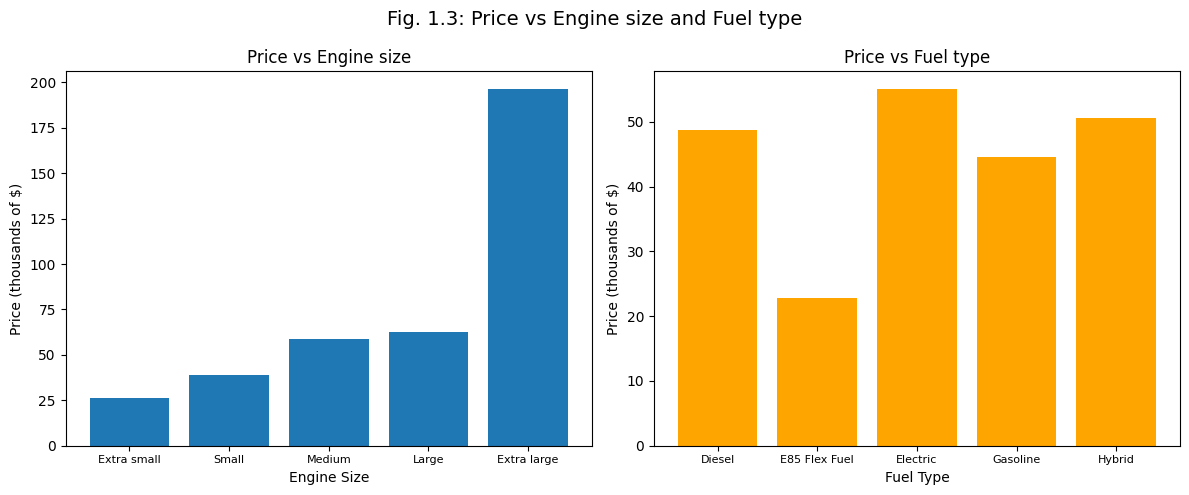

In [55]:
df_engine_size_grouped = df.groupby(by=['engine_size_binned'], observed=False)['price'].mean() #average car price per engine size
df_fuel_type_grouped = df.groupby(by=['fuel_type'], observed=False)['price'].mean() #average car price per fuel type

fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].bar(df_engine_size_grouped.index, df_engine_size_grouped.values/scaling_factor)
axs[1].bar(df_fuel_type_grouped.index, df_fuel_type_grouped.values/scaling_factor, color = 'orange')

axs[0].set_title('Price vs Engine size')
axs[0].set_ylabel('Price (thousands of $)')
axs[0].set_xlabel('Engine Size')
axs[0].tick_params(axis='x', labelsize=8) 

axs[1].set_title('Price vs Fuel type')
axs[1].set_ylabel('Price (thousands of $)')
axs[1].set_xlabel('Fuel Type')
axs[1].tick_params(axis='x', labelsize=8)

fig.suptitle('Fig. 1.3: Price vs Engine size and Fuel type', fontsize=14)

plt.tight_layout()
plt.show()   

## 1.4 Plot price vs transmission, accident, and clean title

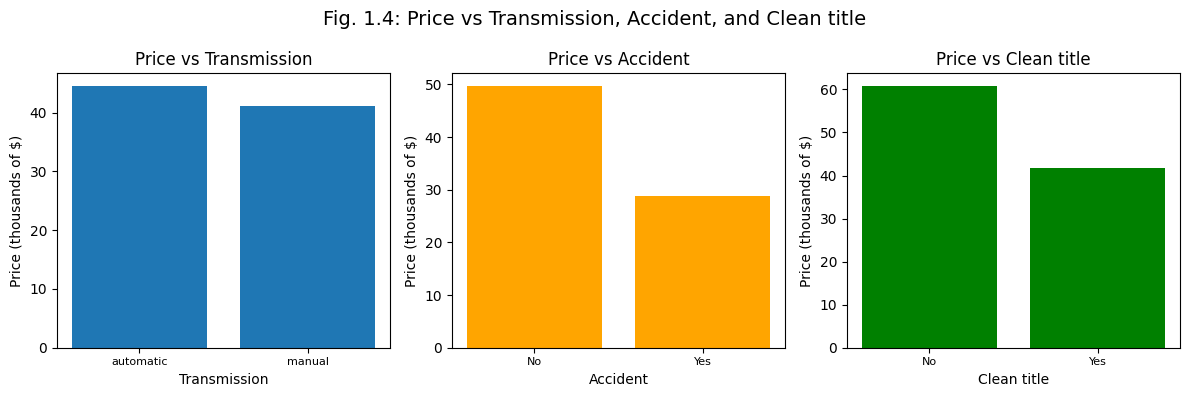

In [56]:
df_transmission_grouped = df.groupby(by=['transmission'])['price'].mean() #average car price per transmission type
df_accident_grouped = df.groupby(by=['accident'])['price'].mean() #average car price per yes or no accident
df_clean_title_grouped = df.groupby(by=['clean_title'])['price'].mean() #average car price per yes or no clean title

fig, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].bar(df_transmission_grouped.index, df_transmission_grouped.values/scaling_factor)
axs[1].bar(df_accident_grouped.index, df_accident_grouped.values/scaling_factor, color = 'orange')
axs[2].bar(df_clean_title_grouped.index, df_clean_title_grouped.values/scaling_factor, color = 'green')

axs[0].set_title('Price vs Transmission')
axs[0].set_ylabel('Price (thousands of $)')
axs[0].set_xlabel('Transmission')
axs[0].tick_params(axis='x', labelsize=8) 

axs[1].set_title('Price vs Accident')
axs[1].set_ylabel('Price (thousands of $)')
axs[1].set_xlabel('Accident')
axs[1].tick_params(axis='x', labelsize=8)
#custom labels for better clarity
axs[1].set_xticks([0,1])
axs[1].set_xticklabels(['No', 'Yes'])

axs[2].set_title('Price vs Clean title')
axs[2].set_ylabel('Price (thousands of $)')
axs[2].set_xlabel('Clean title')
axs[2].tick_params(axis='x', labelsize=8)
#custom labels for better clarity
axs[2].set_xticks([0,1])
axs[2].set_xticklabels(['No', 'Yes'])

fig.suptitle('Fig. 1.4: Price vs Transmission, Accident, and Clean title', fontsize=14)

plt.tight_layout()
plt.show()

## 1.5 Plot price vs brand

There are too many brands (57) to visualize clearly how they affect the car price. I focus on the 7 most frequent ones (which represent almost half of the dataset).

In [57]:
df.brand.nunique()

57

I select such brands:

In [58]:
n = 7
top7_brands = df['brand'].value_counts().head(n).index
top7_brands

Index(['Ford', 'BMW', 'Mercedes-Benz', 'Chevrolet', 'Porsche', 'Audi',
       'Toyota'],
      dtype='object', name='brand')

I select the df corresponding to such brands:

In [59]:
df_top7_brands = df[df['brand'].isin(top7_brands)]
df_top7_brands.shape

(1968, 14)

As I mentioned, these 7 brands account for almost half of the dataframe size.

C:\Users\arian\AppData\Local\Temp\ipykernel_23936\1292951588.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(labels=df_top7_brands_grouped.index, rotation=45)


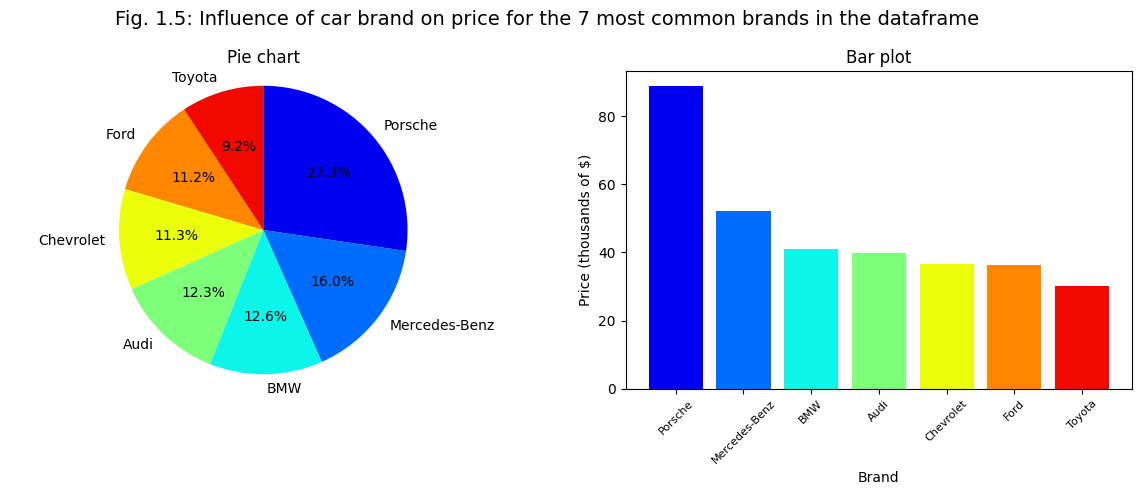

In [60]:
#average car price per brand
df_top7_brands_grouped = df_top7_brands.groupby(by=['brand'])['price'].mean().sort_values(ascending=False)

#selecting 7 colors from the 'jet' cmap
colors = plt.cm.jet(np.linspace(0.1, 0.9, n)) #0.1 and 0.9 rather than 0 and 1 otherwise the red and blue are too dark

fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].pie(
    df_top7_brands_grouped,
    labels=df_top7_brands_grouped.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    counterclock=False
)
axs[0].axis('equal')  
axs[0].set_title('Pie chart')

axs[1].bar(df_top7_brands_grouped.index, df_top7_brands_grouped.values/scaling_factor, color=colors)
axs[1].set_ylabel('Price (thousands of $)')
axs[1].set_xlabel('Brand')
axs[1].tick_params(axis='x', labelsize=8)
axs[1].set_xticklabels(labels=df_top7_brands_grouped.index, rotation=45)
axs[1].set_title('Bar plot')

fig.suptitle('Fig. 1.5: Influence of car brand on price for the 7 most common brands in the dataframe', fontsize=14)

plt.tight_layout()
plt.show()

## 1.6 Investigate the correlation between numerical features

I select all the numeric features in the dataframe.

In [61]:
numeric_df = df.select_dtypes(include = 'number')
numeric_df.head()

,mileage,engine_size,accident,clean_title,price,car_age
0,51000.0,3.7,1.0,1.0,10300.0,11
1,34742.0,3.8,1.0,1.0,38005.0,3
2,22372.0,3.5,0.0,0.0,54598.0,2
3,88900.0,3.5,0.0,1.0,15500.0,9
4,9835.0,2.0,0.0,0.0,34999.0,3


Before checking the correlation between the numerical features, I quickly check their distributions to better understand which type of correlation coefficient to use (I already know that price is not normally distributed - see Fig. 1.1).

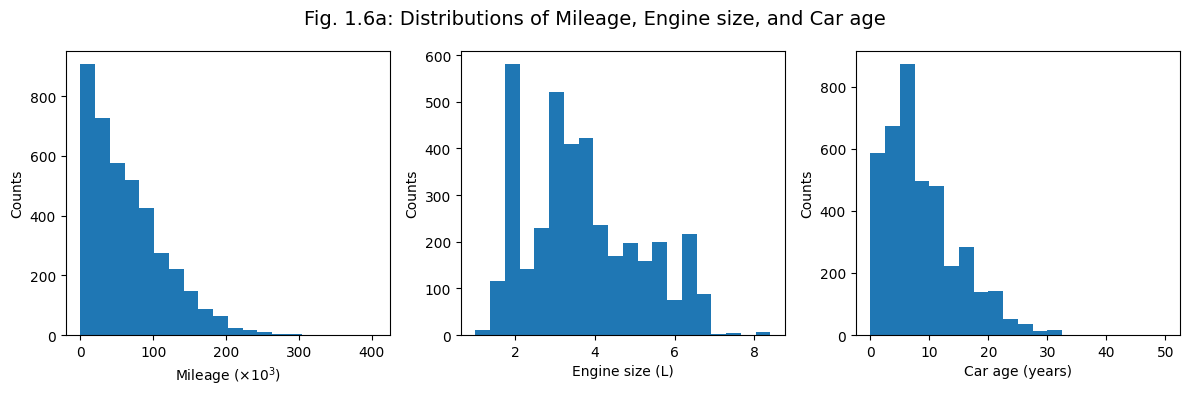

In [62]:
fig, axs = plt.subplots(1,3, figsize=(12,4))

bins=20

axs[0].hist(df.mileage/scaling_factor, bins=bins)
axs[1].hist(df.engine_size, bins=bins)
axs[2].hist(df.car_age, bins=bins)

axs[0].set_xlabel(r'Mileage ($\times 10^3)$')
axs[0].set_ylabel('Counts')

axs[1].set_xlabel('Engine size (L)')
axs[1].set_ylabel('Counts')

axs[2].set_xlabel('Car age (years)')
axs[2].set_ylabel('Counts')

fig.suptitle('Fig. 1.6a: Distributions of Mileage, Engine size, and Car age', fontsize=14)

plt.tight_layout()
plt.show()

Fig. 1.6a shows that also mileage and car age are not normally distributed (while engine size seems to follow a normal distribution). Thus, using the Spearman correlation coefficient is more suitable for my dataframe. This is the case also because I know that the relationships between price and mileage/car age are not strictly linear (see Fig. 2) (they are however close to monotonic). Finally, Spearman correlation is more suitable in my case also because my numerical dataframe contains binary features (such as accident and clean title), which are better dealt with by Spearman rather than Pearson.

Thus, I create the correlation matrix using the Spearman method.

In [63]:
corr_matrix = numeric_df.corr(method='spearman')

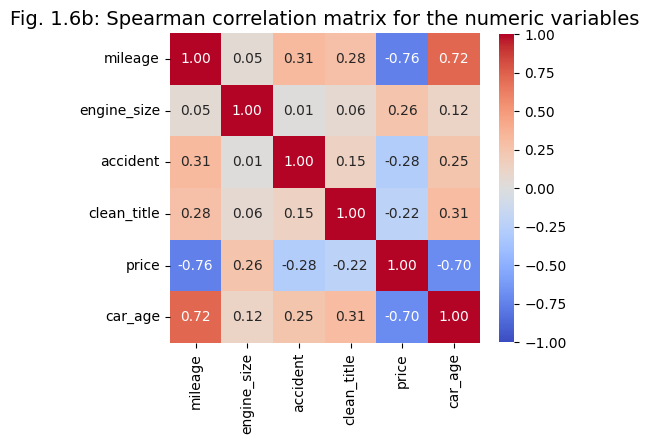

In [64]:
plt.figure(figsize=(5, 5))  

sns.heatmap(
corr_matrix,
cmap='coolwarm',
vmin=-1,   
vmax=1,    
annot=True,
fmt='.2f',
cbar_kws={'shrink': 0.8},
square=True

)

plt.title('Fig. 1.6b: Spearman correlation matrix for the numeric variables', fontsize=14)

plt.show()

The two features that are most strongly correlated to price (through a negative correlation) are mileage and car age. As one would expect, there is  also a strong positive correlation between mileage and car age.

Now I check the statistical significance of these correlations:

In [65]:
print('The Spearman correlation coefficients and corresponding p-values are:\n')

corr, p_value = scipy.stats.spearmanr(df.mileage, df.price)
print(f"-between mileage and price: {corr:.2f}, p-value: {p_value:.2f}")

corr, p_value = scipy.stats.spearmanr(df.car_age, df.price)
print(f"-between car age and price: {corr:.2f}, p-value: {p_value:.2f}")

df_valid = df[['accident', 'price']].dropna() #drop nan values
corr, p_value = scipy.stats.spearmanr(df_valid.accident, df_valid.price)
print(f"-between accident and price: {corr:.2f}, p-value: {p_value:.2f}")

df_valid = df[['engine_size', 'price']].dropna() #drop nan values
corr, p_value = scipy.stats.spearmanr(df_valid.engine_size, df_valid.price)
print(f"-between engine size and price: {corr:.2f}, p-value: {p_value:.2f}")

corr, p_value = scipy.stats.spearmanr(df.clean_title, df.price)
print(f"-between clean title and price: {corr:.2f}, p-value: {p_value:.2f}")

The Spearman correlation coefficients and corresponding p-values are:

-between mileage and price: -0.76, p-value: 0.00
-between car age and price: -0.70, p-value: 0.00
-between accident and price: -0.28, p-value: 0.00
-between engine size and price: 0.26, p-value: 0.00
-between clean title and price: -0.22, p-value: 0.00


The low p-values indicate that all these correlations are statistically significant.

# Objective 2

Build a random forest regression model to predict the car price and assess its performance.

I do not use all features to train my model. Specifically, I drop 'model', 'ext_col', and 'int_col'. Given more time, I would have liked to process and use these features to see if the model performance would improve. I also drop the 'engine_size_binned' and 'mileage_binned' features that I had created.

In [66]:
df = df.drop(['model', 'ext_col', 'int_col', 'engine_size_binned', 'mileage_binned'], axis=1)
print(df.shape)
df.head()

(4009, 9)


,brand,mileage,fuel_type,engine_size,transmission,accident,clean_title,price,car_age
0,Ford,51000.0,E85 Flex Fuel,3.7,automatic,1.0,1.0,10300.0,11
1,Hyundai,34742.0,Gasoline,3.8,automatic,1.0,1.0,38005.0,3
2,Lexus,22372.0,Gasoline,3.5,automatic,0.0,0.0,54598.0,2
3,INFINITI,88900.0,Hybrid,3.5,automatic,0.0,1.0,15500.0,9
4,Audi,9835.0,Gasoline,2.0,automatic,0.0,0.0,34999.0,3


I also remove the car brands that contain at least 3 entries. 

In [67]:
brand_counts = df.brand.value_counts()
brand_more_than_3 = brand_counts[brand_counts>=3].index

df = df[df['brand'].isin(brand_more_than_3)]
print(df.shape)
df.head()

(3999, 9)


,brand,mileage,fuel_type,engine_size,transmission,accident,clean_title,price,car_age
0,Ford,51000.0,E85 Flex Fuel,3.7,automatic,1.0,1.0,10300.0,11
1,Hyundai,34742.0,Gasoline,3.8,automatic,1.0,1.0,38005.0,3
2,Lexus,22372.0,Gasoline,3.5,automatic,0.0,0.0,54598.0,2
3,INFINITI,88900.0,Hybrid,3.5,automatic,0.0,1.0,15500.0,9
4,Audi,9835.0,Gasoline,2.0,automatic,0.0,0.0,34999.0,3


In [68]:
df.brand.nunique()

49

## 2.1 Train/test split

I define the features (X) and target (y) and perform train/test split.

In [69]:
X = df.drop('price', axis=1)
y = df.price

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=0)

## 2.2 Data preprocessing (imputing and encoding)

I differentiate between numerical, binary, nominal, and high-cardinality features to apply different preprocessing steps using pipelines.

In [70]:
numerical_feat = ['mileage', 'engine_size', 'car_age']
binary_feat = ['accident', 'clean_title']
nominal_feat = ['fuel_type', 'transmission']
high_card_feat = ['brand']

I define four preprocessors for the four feature types and I combine them using ColumnTransformer.

In [71]:
# Preprocessing for numerical features: I impute missing values with the mean
numerical_preprocessor = SimpleImputer(strategy='mean')

# Preprocessing for binary features: I impute missing values with the mode
binary_preprocessor = SimpleImputer(strategy='most_frequent')

# Preprocessing for nominal features with a pipeline: I impute missing values with the mode 
#and I encode the various categories with OH encoding
nominal_preprocessor = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('encoder', OneHotEncoder(sparse_output=False))
])

# Preprocessing for high-cardinality features: there are too many brands for OH encoding. I use target encoding
target_preprocessor = TargetEncoder(target_type="continuous", random_state=0)

# Column transformer to appy different preprocessing steps to the different features
preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_preprocessor, numerical_feat),
        ('bin', binary_preprocessor, binary_feat),
        ('nom', nominal_preprocessor, nominal_feat),
        ('target', target_preprocessor, high_card_feat)
])

I define the final pipeline, which includes the preprocessor and the random forest regressor.

In [72]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=0))
])

## 2.3 Grid search with cross validation

I tune some important model hyperparameters to control potential overfitting. I do this step through grid search in combination with cross validation so that all folds of the training set are used to both train and evaluate the model for the various hyperparameter combinations. CV is particularly important as my dataframe is rather small. 

In [73]:
#set the hyperparameter values
parameters = {
    'regressor__n_estimators': [100, 300, 500],
    'regressor__max_depth': [10, 15, 20],
    'regressor__min_samples_split': [5, 10],  
    'regressor__min_samples_leaf': [2, 5, 10] 
}

#set CV
cv = KFold(n_splits=4, shuffle=True, random_state=0)

#set grid serch
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

## 2.4 Model fitting

Now I fit the model I have created on the training set.

In [74]:
%%time
grid_search.fit(X_train_reg, y_train_reg)

CPU times: total: 2.31 s
Wall time: 2min 11s


GridSearchCV(cv=KFold(n_splits=4, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         ['mileage',
                                                                          'engine_size',
                                                                          'car_age']),
                                                                        ('bin',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         ['accident',
                                                                          'clean_title']),
                                                                        ('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('en...
                                                                         ['fuel_type',
                                                                          'transmission']),
                                                                        ('target',
                                                                         TargetEncoder(random_state=0,
                                                                                       target_type='continuous'),
                                                                         ['brand'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [10, 15, 20],
                         'regressor__min_samples_leaf': [2, 5, 10],
                         'regressor__min_samples_split': [5, 10],
                         'regressor__n_estimators': [100, 300, 500]},
             scoring='r2')

## 2.5 Model evaluation

I evaluate the model performance and check for overfitting.

In [75]:
print('The best parameters found are {}'.format(grid_search.best_params_))

The best parameters found are {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}


I get the best model (that is, the one with the best combination of hyperparameters) and use it to make predictions.

In [76]:
# Get the best model
model = grid_search.best_estimator_

# Predict on the test set
y_pred_test_reg = model.predict(X_test_reg)

# Predict on the training set
y_pred_train_reg = model.predict(X_train_reg)

I calculate the R2 score for the four CV folds, the full training set, and the test set.

In [77]:
print('The mean cross-validation R2 score is {:.2f}'.format(grid_search.best_score_))
print('The R2 score for the training set is {:.2f}'.format(r2_score(y_train_reg, y_pred_train_reg)))
print('The R2 score for the test set is {:.2f}'.format(r2_score(y_test_reg, y_pred_test_reg)))

The mean cross-validation R2 score is 0.53
The R2 score for the training set is 0.47
The R2 score for the test set is 0.45


I plot the predicted price as a function of the actual price for the test set. The line indicating perfect prediction is superimposed.

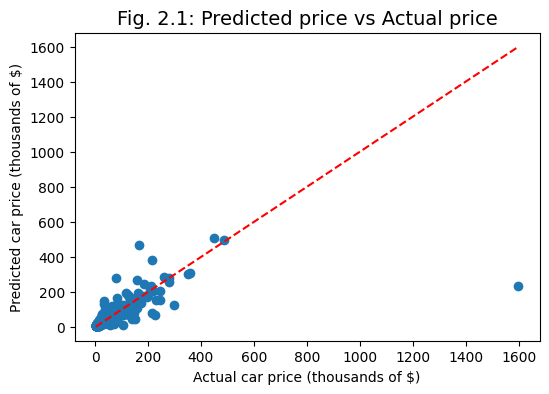

In [78]:
plt.figure(figsize=(6, 4))

plt.scatter(y_test_reg/scaling_factor, y_pred_test_reg/scaling_factor)
plt.plot([y_test_reg.min()/scaling_factor, y_test_reg.max()/scaling_factor], 
         [y_test_reg.min()/scaling_factor, y_test_reg.max()/scaling_factor], 
         'r--')

plt.xlabel('Actual car price (thousands of $)')
plt.ylabel('Predicted car price (thousands of $)')
plt.title('Fig. 2.1: Predicted price vs Actual price', fontsize=14)
 
plt.show()

# Objective 3

Build a random forest classification model to predict whether a car was involved in an accident.

As above, I do not use all features to train my model. Specifically, I drop 'model', 'ext_col', and 'int_col'. Given more time, I would have liked to process and use these features to see if the model performance would improve. I also remove the car brands that contain at least 3 entries and drop the 'engine_size_binned' and 'mileage_binned' features that I had created.

In [79]:
df_copy.head() #I use the copy of the df I created after data wrangling

,brand,model,mileage,fuel_type,engine_size,transmission,ext_col,int_col,accident,clean_title,price,car_age,engine_size_binned,mileage_binned
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,3.7,automatic,Black,Black,1.0,1.0,10300.0,11,Small,50000.0
1,Hyundai,Palisade SEL,34742.0,Gasoline,3.8,automatic,Moonlight Cloud,Gray,1.0,1.0,38005.0,3,Small,30000.0
2,Lexus,RX 350 RX 350,22372.0,Gasoline,3.5,automatic,Blue,Black,0.0,0.0,54598.0,2,Small,20000.0
3,INFINITI,Q50 Hybrid Sport,88900.0,Hybrid,3.5,automatic,Black,Black,0.0,1.0,15500.0,9,Small,80000.0
4,Audi,Q3 45 S line Premium Plus,9835.0,Gasoline,2.0,automatic,Glacier White Metallic,Black,0.0,0.0,34999.0,3,Extra small,0.0


In [80]:
df2 = df_copy.drop(['model', 'ext_col', 'int_col', 'engine_size_binned', 'mileage_binned'], axis=1)
df2.head()

,brand,mileage,fuel_type,engine_size,transmission,accident,clean_title,price,car_age
0,Ford,51000.0,E85 Flex Fuel,3.7,automatic,1.0,1.0,10300.0,11
1,Hyundai,34742.0,Gasoline,3.8,automatic,1.0,1.0,38005.0,3
2,Lexus,22372.0,Gasoline,3.5,automatic,0.0,0.0,54598.0,2
3,INFINITI,88900.0,Hybrid,3.5,automatic,0.0,1.0,15500.0,9
4,Audi,9835.0,Gasoline,2.0,automatic,0.0,0.0,34999.0,3


In [81]:
df2 = df2[df2['brand'].isin(brand_more_than_3)]
print(df2.shape)
df2.head()

(3999, 9)


,brand,mileage,fuel_type,engine_size,transmission,accident,clean_title,price,car_age
0,Ford,51000.0,E85 Flex Fuel,3.7,automatic,1.0,1.0,10300.0,11
1,Hyundai,34742.0,Gasoline,3.8,automatic,1.0,1.0,38005.0,3
2,Lexus,22372.0,Gasoline,3.5,automatic,0.0,0.0,54598.0,2
3,INFINITI,88900.0,Hybrid,3.5,automatic,0.0,1.0,15500.0,9
4,Audi,9835.0,Gasoline,2.0,automatic,0.0,0.0,34999.0,3


There are some NaN values in the 'accident' column:

In [82]:
df2.accident.isna().sum()

np.int64(113)

I drop the corresponding rows from the df:

In [83]:
df2 = df2[df2['accident'].notna()]
df2.accident.isna().sum()

np.int64(0)

The dataset is slightly imbalanced, as shown by the code below. I need to take this into account when building the classifier.

In [84]:
df2.accident.value_counts()

accident
0.0    2901
1.0     985
Name: count, dtype: int64

## 3.1 Train/test split

I define the features (X) and target (y) and perform train/test split with stratification to account for class imbalance.

In [85]:
X = df2.drop('accident', axis=1)
y = df2.accident

X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## 3.2 Data preprocessing (imputing and encoding)

I differentiate between numerical, binary, nominal, and high-cardinality features to apply different preprocessing steps using pipelines.

In [86]:
numerical_feat = ['mileage', 'engine_size', 'price', 'car_age']
binary_feat = ['clean_title']
nominal_feat = ['fuel_type', 'transmission']
high_card_feat = ['brand']

I define four preprocessors for the four feature types and I combine them using ColumnTransformer.

In [87]:
# Preprocessing for numerical features: I impute missing values with the mean
numerical_preprocessor = SimpleImputer(strategy='mean')

# Preprocessing for binary features: I impute missing values with the mode
binary_preprocessor = SimpleImputer(strategy='most_frequent')

# Preprocessing for nominal features with a pipeline: I impute missing values with the mode 
#and I encode the various categories with OH encoding
nominal_preprocessor = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('encoder', OneHotEncoder(sparse_output=False))
])

# Preprocessing for high-cardinality features: there are too many brands for OH encoding. I use target encoding
target_preprocessor = TargetEncoder(target_type="binary", random_state=0)

# Column transformer to appy different preprocessing steps to the different features
preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_preprocessor, numerical_feat),
        ('bin', binary_preprocessor, binary_feat),
        ('nom', nominal_preprocessor, nominal_feat),
        ('target', target_preprocessor, high_card_feat)
])

I define the final pipeline, which includes the preprocessor and the random forest classifier. For the latter, I use class_weight='balanced' to account for class imbalance.

In [88]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=0))
])

## 3.3 Grid search with cross validation

I tune some important model hyperparameters to control potential overfitting. I do this step through grid search in combination with cross validation so that all folds of the training set are used to both train and evaluate the model for the various hyperparameter combinations. CV is particularly important as my dataframe is rather small. In this case, I use CV with StratifiedKFold to account for class imbalance.

In [89]:
#set the hyperparameter values
parameters = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [10, 15, 20],
    'classifier__min_samples_split': [5, 10],  
    'classifier__min_samples_leaf': [2, 5, 10] 
}

#set CV
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

#set grid serch
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    cv=cv,
    scoring='recall_macro',
    n_jobs=-1
)

## 3.4 Model fitting

Now I fit the model I have created on the training set.

In [90]:
%%time
grid_search.fit(X_train_clas, y_train_clas)

CPU times: total: 1.31 s
Wall time: 1min 8s


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         ['mileage',
                                                                          'engine_size',
                                                                          'price',
                                                                          'car_age']),
                                                                        ('bin',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         ['clean_title']),
                                                                        ('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'...
                                                                        ('target',
                                                                         TargetEncoder(random_state=0,
                                                                                       target_type='binary'),
                                                                         ['brand'])])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=0))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 15, 20],
                         'classifier__min_samples_leaf': [2, 5, 10],
                         'classifier__min_samples_split': [5, 10],
                         'classifier__n_estimators': [100, 300, 500]},
             scoring='recall_macro')

## 3.5 Model evaluation

I evaluate the model performance and check for overfitting.

In [91]:
print('The best parameters found are {}'.format(grid_search.best_params_))

The best parameters found are {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


I get the best model (that is, the one with the best combination of hyperparameters) and use it to make predictions.

In [92]:
# Get the best model
model = grid_search.best_estimator_

# Predict on the test set
y_pred_test_clas = model.predict(X_test_clas)

# Predict on the training set
y_pred_train_clas = model.predict(X_train_clas)

I calculate the macro recall score for the four CV folds, the full training set, and the test set.

In [93]:
print('The mean cross-validation macro recall score is {:.2f}'.format(grid_search.best_score_))
print('The macro recall score for the training set is {:.2f}'.format(recall_score(y_train_clas, y_pred_train_clas, average='macro')))
print('The macro recall score for the test set is {:.2f}'.format(recall_score(y_test_clas, y_pred_test_clas, average='macro')))

The mean cross-validation macro recall score is 0.66
The macro recall score for the training set is 0.72
The macro recall score for the test set is 0.64


I print the classification report:

In [94]:
print("Classification report:\n", classification_report(y_test_clas, y_pred_test_clas, digits=2))

Classification report:
               precision    recall  f1-score   support

         0.0       0.85      0.56      0.67       581
         1.0       0.35      0.72      0.48       197

    accuracy                           0.60       778
   macro avg       0.60      0.64      0.57       778
weighted avg       0.73      0.60      0.62       778



I plot the confusion matrix:

Text(0.5, 1.0, 'Fig. 3.1: Confusion matrix')

<Figure size 500x500 with 0 Axes>

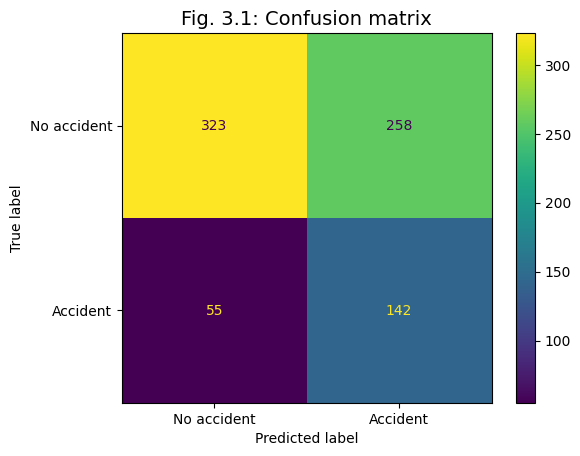

In [95]:
cm = confusion_matrix(y_test_clas, y_pred_test_clas)

plt.figure(figsize=(5, 5))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No accident', 'Accident'])
disp.plot()

plt.title('Fig. 3.1: Confusion matrix', fontsize=14)  

# Project Outcome (10 + 10 marks)

## Overview of Results
Upon close inspection of the dataset, I found that it required considerable wrangling to deal with inconsistent feature dtypes and category unification, as well as to extract meaningful information from the existing features (most notably, the engine size and whether a car is electric). By systematically dealing  with these issues, I transformed the original dataset in a more suitable form to answer my questions.   

I found that the car price does not follow a normal distribution, and through both visualization and correlation analyses, I observed that the numerical features that influence the car price the most are mileage and car age, followed by accident, engine size, and clean title. Regarding the categorical features, both brand and fuel type also clearly affect the car price, while transmission seems to be less relevant.

After suitable preprocessing, I built a random forest regression model to predict the price based on the above features. The model does not perform great on the training data and does not generalize well for the unseen data (the test set). 

I then built a random forest classification model to predict whether a car was involved in an accident based on the above features. Also in this case, the model struggles to correctly classify both the training and test data. 

There may be several reasons why the two models underperform, which will be interesting to analyse in future work.

## Objective 1

### Explanation of Results

I analysed how the price is influenced by various features. 

In Fig. 1.1, the histogram reveals that the price is not normally distributed (perhaps it follows a log-normal distribution?), while the box plot shows the presence of several outliers (above $\sim$100,000$).

Fig. 1.2 shows that both mileage and car age are inversely correlated with price (as expected). Even if the data is very noisy, one can see that the trend is not exactly linear, but the relationship is nonetheless close to monotonous. The lines superimposed on the scatter plots are merely guides for the eye that show price averages.

Fig. 1.3 shows that also the engine size and fuel type influence the price, with larger engine sizes clearly corresponding to higher prices and electric cars costing more than double petrol cars. 

Fig. 1.4 shows that the transmission is not such an important predictor of the car price, while both accident and clean title are stronger predictors. While it is clear that a car with no accident history costs more than one that was involved in an accident, it is not immediately clear why a car with a clean title should cost less than one without it. A possible reason may be that if the car has a clean title, it means that there is no outstanding loan, which probably also means that the car is older (and thus cheaper). I inspected the df and found that indeed cars with a clean title are on average older than cars without, so this explanation may be reasonable. 

Fig. 1.5 shows that the brand has a strong influence on the car price (at least for the 7 most common brands I have investigated), with Porche cars costing almost double the average price of the other 6 brands (if all brands had an equal average price, the pie chart would be equally split into 7, i.e., 100/7 = 14.3; and 27.3\% is almost double 14.3\%). 

The histograms in Fig. 1.6a show that perhaps only the engine size follows a normal distribution. The fact that most features (price included) do not follow a normal distribution and the fact that the relationships between features are nonlinear call for the necessity of using the Spearman method to determine the correlation coefficients. Fig. 1.6b shows the corresponding correlation matrix for the numerical features. This matrix yields the correlation coefficients, confirming that mileage and car age have the strongest (negative) correlation with price. Furthermore, all relationships are statistically significant as the corresponding p-values are 0 (see 'Program Code' section).   

## Objective 2
### Explanation of Results

I built a random forest regression model to predict the car price based on brand, mileage, fuel type, engine size, transmission, accident, clean title, and	car age. After train/test split, I performed imputation and encoding using pipelines. I then tuned the hyperparameters using grid search combined with cross validation, and I finally fit the model on the training set.

I set the hyperparameters quite conservatively to avoid potential overfitting (for instance, I did not let the trees grow indefinitely). The best hyperparameters selected after grid search + cv are not extreme, which would suggest that overfitting is under control. 

However, the R2 score for both the cv folds and the training set is rather poor (0.53 and 0.47, respectively). It also puzzles me the fact that the R2 score for the cv folds is higher than that of the training set (I would expect the opposite). Furthermore, the R2 score for the test set is slightly lower (0.45), indicating that the model does not overfit much, but it does also not generalize well on unseen data. Indeed, Fig. 2.1 shows how the plot of predicted vs actual price deviates from the red straight line (which indicates perfect prediction capability).

Possible reasons behind the poor predictive performance of the model could be:

- small and noisy dataset,
- features not informative enough (could have use brand and model to discretize the cars into 'luxury'/'mid-range'/'budget' categories rather than using target encoding or could have extracted more features (e.g., 'price per mile')),
- too many outliers, which I haven't removed.

## Objective 3
### Explanation of Results

I built a random forest classification model to predict whether a car was involved in an accident based on brand, mileage, fuel type, engine size, transmission, clean title, price, and car age. After train/test split, I performed imputation and encoding using pipelines. I then tuned the hyperparameters using grid search combined with cross validation, and I finally fit the model on the training set. In all these steps, I took into account the fact that the target variable is slightly imbalanced (2901 vs 985) and adopted suitable techniques (e.g., train/test split with stratification).  

As for objective 2, I set the hyperparameters quite conservatively to avoid potential overfitting (for instance, I did not let the trees grow indefinitely). The best hyperparameters selected after grid search + cv are  not extreme, which would suggest that overfitting is under control. 

I chose to focus on the macro recall score (also known as balanced accuracy) because this is a more suitable metric for imbalanced datasets. 

The macro recall score is not very high for the training set and the cv folds (0.72 and 0.66, respectively). In this case, it is higher for the training set, which is what I expected. It is only slightly lower for the test set (0.64), which is also a good indication that the model is not overfitting. 

Specifically, as shown by the classification report in the 'Program Code' section, the recall for the positive class (accident = yes), that is how many of the actual positives are found, is 0.72. This again shows that the model could be improved; however, it is good that this metric is higher than the recall for the negative class (0.56) as it is more important to detect cars that had accidents correctly. Also see the confusion matrix.

Possible reasons behind the poor classification performance of the model could be:

- small and noisy dataset,
- features not informative enough (could have use brand and model to discretize the cars into 'luxury'/'mid-range'/'budget' categories rather than using target encoding or could have extracted more features (e.g., 'price per mile')),
- too many outliers, which I haven't removed.

# Conclusion and presentation (10 marks)

### Achievements
I performed thorough data wrangling, making categories uniform, extracting new features, and discretizing some continuous variables into suitable intervals, which permitted accurate data analysis to be conducted. 

I was able to clearly identify, both through quantitative (correlation) and qualitative (visualization) techniques, how the various features influence the car price. To achieve this objective, I used histograms, box plots, scatter plots, bar plots, and pie charts. I also created and visualised the Spearman correlation matrix.

I implemented a random forest regressor to predict the car price based on several key features. To achieve this objective, I split the dataset into training and test sets and used pipelines to avoid data leakage for imputation and encoding. I tuned the model hyperparameters through grid search and cross validation, utilizing values that minimized overfitting, and I evaluated the model accuracy both visually and quantitatively.

I implemented a random forest classifier to predict whether a car was involved in an accident based on several key features. To achieve this objective, I split the dataset into training and test sets and used pipelines to avoid data leakage for imputation and encoding. I tuned the model hyperparameters through grid search and cross validation, utilizing values that minimized overfitting, and I evaluated the model accuracy using the classification report and the confusion matrix. I took into account the unbalanced nature of the target variable using suitable techniques. 


### Limitations
The primary limitation of this analysis was caused by the small size of the dataset, its noisy features, and the presence of outliers. Furthermore, potentially useful features were not provided (such as fuel efficiency and car type (e.g., pick-up, SUV, sedan, etc.)). 

Regarding the models I built, there is clearly room for improvement as both perform rather poorly both on the training set and on unseen data. The noisy nature and small size of the dataset may also be responsible for this.  

### Future Work
I feel that certain improvements could be made to the models by performing additional feature extraction/engineering. For instance, rather than using target encoding for the different brands, it could be useful to use both the brand and model information to discretize the brand feature into 'luxury'/'mid-range'/'budget' categories. Furthermore, I chose to not remove any outliers at this stage, but it would definitely be worth evaluating their influence on the model performance. I didn’t use the information provided regarding the colour, but I would investigate this further in the future. I could also consider working on a larger dataset to obtain more robust models.